In [6]:
import leuvenmapmatching as lv
import snman
import networkx as nx
import geopandas as gpd
from leuvenmapmatching.matcher.distance import DistanceMatcher
from leuvenmapmatching.map.inmem import InMemMap
from leuvenmapmatching import visualization as mmviz
import shapely as shp
import momepy

path='C:/DATA/CLOUD STORAGE/polybox/Research/SNMan/SNMan Shared/development/'
crs=2056

source = gpd.read_file(path + 'source_network.gpkg').to_crs(crs)
target = gpd.read_file('C:/DATA/CLOUD STORAGE/polybox/Research/SNMan/SNMan Shared/qgis_previews/edges.gpkg').to_crs(crs)

source_test_path = source.iloc[1]['geometry']

#G = nx.read_shp(path + 'target_network.gpkg')
G = nx.from_pandas_edgelist(target, source='u', target='v', edge_attr='geometry')
G = G.to_undirected()

for id, data in G.edges.items():
    u, v = id
    G.nodes[u]['geometry'] = shp.geometry.Point(data['geometry'].coords[0])
    G.nodes[v]['geometry'] = shp.geometry.Point(data['geometry'].coords[-1])


#snman.export_streetgraph(G, path + 'edges.gpkg', path + 'nodes.gpkg')

In [7]:
list(G.nodes.items())

[(0, {'geometry': <shapely.geometry.point.Point at 0x1a8e3329b20>}),
 (100, {'geometry': <shapely.geometry.point.Point at 0x1a8f0f02ac0>}),
 (1, {'geometry': <shapely.geometry.point.Point at 0x1a8f0eecbb0>}),
 (295, {'geometry': <shapely.geometry.point.Point at 0x1a8e380ef10>}),
 (2, {'geometry': <shapely.geometry.point.Point at 0x1a8f0f18910>}),
 (206, {'geometry': <shapely.geometry.point.Point at 0x1a8f0f2a190>}),
 (102, {'geometry': <shapely.geometry.point.Point at 0x1a8f0f2a160>}),
 (417, {'geometry': <shapely.geometry.point.Point at 0x1a8f0f185b0>}),
 (204, {'geometry': <shapely.geometry.point.Point at 0x1a8f0f18e80>}),
 (3, {'geometry': <shapely.geometry.point.Point at 0x1a8f0f18eb0>}),
 (140, {'geometry': <shapely.geometry.point.Point at 0x1a8f0eeccd0>}),
 (329, {'geometry': <shapely.geometry.point.Point at 0x1a8f0f18790>}),
 (103, {'geometry': <shapely.geometry.point.Point at 0x1a8f0f18dc0>}),
 (4, {'geometry': <shapely.geometry.point.Point at 0x1a8f0f18d90>}),
 (5, {'geometry'

In [8]:
map_con = InMemMap("myosm", use_latlon=False)

# please note that lv works with lat, lon (reverse order)
for id, data in G.nodes.items():
    map_con.add_node(id, (data['geometry'].y, data['geometry'].x))

for id, data in G.edges.items():
    map_con.add_edge(*id)
    map_con.add_edge(*id[::-1])

# reversed coords
path = [coords[::-1] for coords in list(source_test_path.coords)]

a = lv.matcher.distance.BaseMatcher(map_con)
matcher = DistanceMatcher(map_con)

states, _ = matcher.match(path)
nodes = matcher.path_pred_onlynodes

print("States\n------")
print(states)
print("Nodes\n------")
print(nodes)
print("")
matcher.print_lattice_stats()

Searching closeby nodes with linear search, use an index and set max_dist


States
------
[(412, 30), (30, 70)]
Nodes
------
[412, 30, 70]

Stats lattice
-------------
nbr levels               : 2
nbr lattice              : 1724
avg lattice[level]       : 862.0
min lattice[level]       : 862
max lattice[level]       : 862
avg obs distance         : 5.833837509634642
last logprob             : -35.994822891789504
last length              : 2
last norm logprob        : -17.997411445894752


(<Figure size 2000x2006.3 with 1 Axes>, <AxesSubplot: xlabel='X', ylabel='Y'>)

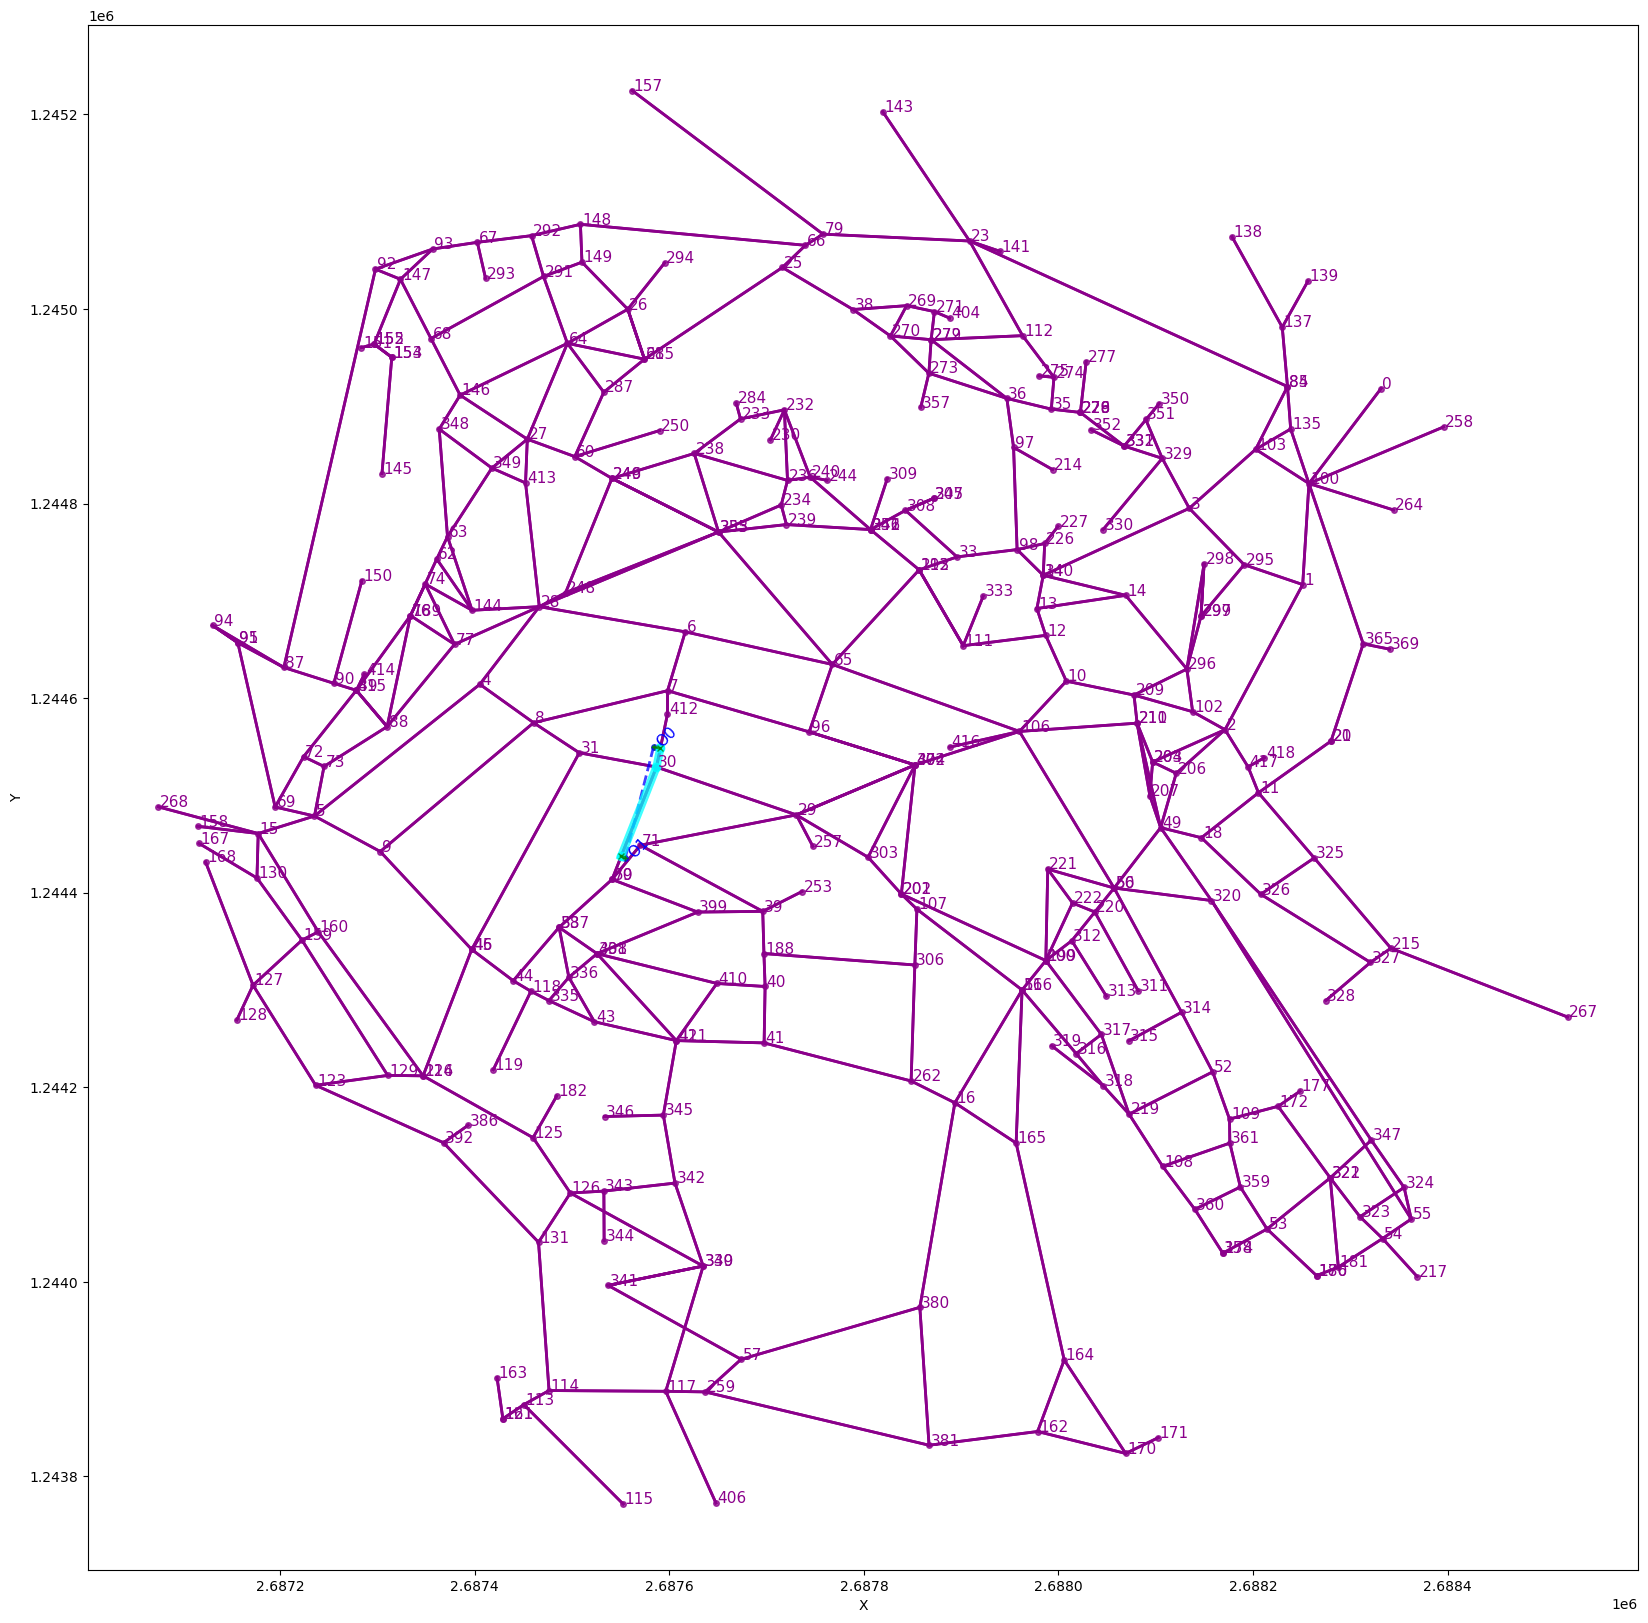

In [9]:
mmviz.plot_map(map_con, matcher=matcher,
               show_labels=True, show_matching=True, show_graph=True)

In [10]:
mmviz.plot_map(map_con, matcher=matcher, show_labels=True, show_matching=True, show_graph=True)

C:\Users\lukas\AppData\Local\Temp\ipykernel_18116\2486306270.py:1: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  target.explode()


,,u,v,key,grade,ln_desc,width_total_m,width_motorized_m,length,n_lanes_motorized,cycling_forward,cycling_backward,maxspeed,highway,hierarchy,layer,geometry
0,0,0,100,0,-0.064,M< | M>,6.0,6.0,129.377918,2,M>,M<,50.0,secondary,3_ded_end,0,"LINESTRING (2688331.613 1244918.223, 2688257.5..."
1,0,1,295,0,0.029,M-,4.5,4.5,64.682000,1,M-,M-,NaN,residential,2_local_road,0,"LINESTRING (2688251.101 1244716.708, 2688190.8..."
2,0,1,100,0,-0.080,M< | M>,6.0,6.0,104.213055,2,M>,M<,50.0,secondary,3_ded_end,0,"LINESTRING (2688251.101 1244716.708, 2688257.5..."
3,0,1,2,0,0.046,M< | M>,6.0,6.0,186.626849,2,M>,M<,50.0,secondary,1_main_road,0,"LINESTRING (2688251.101 1244716.708, 2688232.4..."
4,0,2,206,0,0.037,X-,2.5,0.0,41.262809,0,X-,X-,NaN,path,4_path,0,"LINESTRING (2688171.235 1244567.526, 2688144.6..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,0,399,401,0,0.014,F-,1.8,0.0,70.689408,0,None,None,NaN,path,4_path,0,"LINESTRING (2687629.114 1244380.007, 2687621.1..."
428,0,401,410,0,0.018,M-,4.5,4.5,27.822000,1,M-,M-,NaN,residential,2_local_road,0,"LINESTRING (2687621.138 1244310.093, 2687648.8..."
429,0,410,411,0,0.029,F-,1.8,0.0,69.770000,0,None,None,NaN,footway,4_path,0,"LINESTRING (2687648.820 1244306.655, 2687651.9..."
430,0,412,412,0,0.000,F-,1.8,0.0,83.450083,0,None,None,NaN,footway,4_path,0,"LINESTRING (2687595.570 1244584.068, 2687614.8..."
